In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df=pd.read_excel('C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/Estados/Caracteristicas_estados.xlsx')
df2=df[df['Estado']!='Ciudad de México']
df2=df2[df['Estado']!='México']
df2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Estado,poblacion,pib_18,pib_mineria,pib_ajustado,pib_pc_18,pib_turismo,turismo_pct,turismo_adj,dens_pob_15,...,hogares,carencia_salud,salud_pct,escolaridad,tasa_informal,letalidad,mortalidad,contagios,probit1,probit
0,Aguascalientes,1312544,224807,691,224116,170749.323451,4396,0.019555,0.019615,233.700000,...,9017,1035,0.114783,9.725975,41.271800,0.062754,14.094766,224.601994,-0.057600,-0.05620
1,Baja California,3315766,565895,571,565324,170495.746684,11138,0.019682,0.019702,46.400000,...,11413,1886,0.165250,9.757418,37.330300,0.203266,67.948100,334.281732,0.045800,0.04570
2,Baja California Sur,712029,173047,4887,168160,236170.155991,23710,0.137015,0.140997,9.600000,...,7756,834,0.107530,9.905535,38.731200,0.042083,14.184816,337.064923,-0.053100,-0.06140
3,Campeche,899931,529584,420086,109498,121673.772767,4107,0.007755,0.037508,15.600000,...,6799,792,0.116488,9.138454,62.957800,0.094537,32.113573,339.692710,-0.013100,-0.01470
4,Coahuila de Zaragoza,2954915,609051,13718,595333,201472.123564,6710,0.011017,0.011271,19.500000,...,11582,1557,0.134433,9.897388,34.784600,0.050007,12.183092,243.627989,-0.065700,-0.06780
5,Colima,711235,104475,1660,102815,144558.408965,3354,0.032103,0.032622,126.400000,...,9265,964,0.104047,9.528720,52.008100,0.115594,14.903654,128.930663,-0.005200,-0.00780
6,Chiapas,5217908,271621,5435,266186,51013.931254,5928,0.021825,0.022270,71.200000,...,7207,1261,0.174969,7.288581,71.800500,0.147838,14.220258,96.187974,0.001200,0.00620
7,Chihuahua,3556574,562599,24019,538580,151432.249125,7851,0.013955,0.014577,14.400000,...,12518,1411,0.112718,9.466591,36.912900,0.190789,20.384786,106.844396,0.050700,0.04710
9,Durango,1754754,202547,8204,194343,110752.276387,2739,0.013523,0.014094,14.200000,...,8440,1106,0.131043,9.147610,52.274000,0.066838,10.371824,155.178447,-0.042300,-0.04170
10,Guanajuato,5853677,712902,2998,709904,121274.884145,13335,0.018705,0.018784,191.300000,...,10539,1393,0.132176,8.381851,53.859800,0.047252,9.942469,210.414753,-0.074800,-0.07270


In [3]:
ye=['letalidad','mortalidad','contagios','probit']
equis=['pib_pc_18','edad_mediana_15','10_muertes_dias','dens_pob_15','camas_100mil','escolaridad']

for i in range(len(equis)):
    df2['ln_'+equis[i]]=np.log(df2[equis[i]])

In [4]:
equis2=['ln_pib_pc_18','ln_edad_mediana_15','ln_10_muertes_dias','ln_dens_pob_15','ln_camas_100mil','ln_escolaridad']
X=np.log(df2[equis2])
X['pob_urbana']=df2['pob_urbana']
X['pobre_pct']=df2['pobre_pct']
X['salud_pct']=df2['salud_pct']
X['turismo_adj']=df2['turismo_adj']
X['tasa_informal']=df2['tasa_informal']/100
X = sm.add_constant(X)


In [5]:
y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     1.456
Date:                Tue, 21 Jul 2020   Prob (F-statistic):              0.228
Time:                        16:29:51   Log-Likelihood:                 70.308
No. Observations:                  31   AIC:                            -116.6
Df Residuals:                      19   BIC:                            -99.41
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6886      1.285      0.536      0.598      -2.001       3.378
ln_pib_pc_18          -1.0140      0.574     -1.768      0.093      -2.215       0.187
ln_edad_mediana_15     0.5614      0.602      0.932      0.363      -0.699       1.822
ln_10_muertes_dias     0.3865      0.274      1.411      0.174      -0.187       0.960
ln_dens_pob_15         0.0300      0.028      1.063      0.301      -0.029       0.089
ln_camas_100mil        0.1283      0.162      0.794      0.437      -0.210       0.467
ln_escolaridad         0.4673      0.402      1.163      0.259      -0.374       1.308
pob_urbana            -0.0509      0.091     -0.558      0.583      -0.242       0.140
pobre_pct              0.0766      0.124      0.617      0.544      -0.183       0.336
salud_pct              0.0550      0.342      0.161      0.874      -0.662       0.772
turismo_adj            0.1633      0.142      1.150      0.264      -0.134       0.461
tasa_informal         -0.1152      0.130     -0.887      0.386      -0.387       0.156
==============================================================================
Omnibus:                        1.007   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                0.913
Skew:                           0.386   Prob(JB):                        0.634
Kurtosis:                       2.666   Cond. No.                         991.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
X=X.drop(columns='salud_pct')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     1.681
Date:                Tue, 21 Jul 2020   Prob (F-statistic):              0.155
Time:                        16:29:51   Log-Likelihood:                 70.287
No. Observations:                  31   AIC:                            -118.6
Df Residuals:                      20   BIC:                            -102.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7030      1.250      0.562      0.580      -1.905       3.311
ln_pib_pc_18          -1.0221      0.557     -1.834      0.082      -2.185       0.140
ln_edad_mediana_15     0.5485      0.582      0.942      0.357      -0.666       1.763
ln_10_muertes_dias     0.4157      0.200      2.076      0.051      -0.002       0.833
ln_dens_pob_15         0.0319      0.025      1.263      0.221      -0.021       0.084
ln_camas_100mil        0.1293      0.158      0.821      0.422      -0.199       0.458
ln_escolaridad         0.4366      0.345      1.265      0.220      -0.283       1.157
pob_urbana            -0.0443      0.079     -0.558      0.583      -0.210       0.121
pobre_pct              0.0728      0.119      0.613      0.547      -0.175       0.320
turismo_adj            0.1625      0.138      1.174      0.254      -0.126       0.451
tasa_informal         -0.1115      0.125     -0.895      0.382      -0.372       0.148
==============================================================================
Omnibus:                        0.839   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.789
Skew:                           0.351   Prob(JB):                        0.674
Kurtosis:                       2.656   Cond. No.                         988.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
X=X.drop(columns='pob_urbana')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     1.895
Date:                Tue, 21 Jul 2020   Prob (F-statistic):              0.109
Time:                        16:29:51   Log-Likelihood:                 70.048
No. Observations:                  31   AIC:                            -120.1
Df Residuals:                      21   BIC:                            -105.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8705      1.193      0.729      0.474      -1.611       3.352
ln_pib_pc_18          -1.0416      0.547     -1.904      0.071      -2.179       0.096
ln_edad_mediana_15     0.4924      0.564      0.873      0.392      -0.680       1.665
ln_10_muertes_dias     0.3979      0.194      2.047      0.053      -0.006       0.802
ln_dens_pob_15         0.0285      0.024      1.182      0.250      -0.022       0.079
ln_camas_100mil        0.1126      0.152      0.740      0.467      -0.204       0.429
ln_escolaridad         0.3905      0.330      1.185      0.249      -0.295       1.076
pobre_pct              0.0707      0.117      0.606      0.551      -0.172       0.313
turismo_adj            0.1536      0.135      1.136      0.269      -0.128       0.435
tasa_informal         -0.0948      0.119     -0.797      0.435      -0.342       0.153
==============================================================================
Omnibus:                        1.262   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.986
Skew:                           0.426   Prob(JB):                        0.611
Kurtosis:                       2.802   Cond. No.                         949.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
X=X.drop(columns='pobre_pct')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     2.148
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0745
Time:                        16:29:51   Log-Likelihood:                 69.780
No. Observations:                  31   AIC:                            -121.6
Df Residuals:                      22   BIC:                            -108.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1929      1.053      1.133      0.269      -0.990       3.376
ln_pib_pc_18          -1.1548      0.507     -2.279      0.033      -2.206      -0.104
ln_edad_mediana_15     0.5034      0.555      0.906      0.375      -0.648       1.655
ln_10_muertes_dias     0.4159      0.189      2.197      0.039       0.023       0.808
ln_dens_pob_15         0.0305      0.023      1.298      0.208      -0.018       0.079
ln_camas_100mil        0.0964      0.148      0.653      0.520      -0.210       0.402
ln_escolaridad         0.3298      0.309      1.066      0.298      -0.312       0.971
turismo_adj            0.1514      0.133      1.136      0.268      -0.125       0.428
tasa_informal         -0.0647      0.107     -0.607      0.550      -0.286       0.156
==============================================================================
Omnibus:                        0.759   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.644
Skew:                           0.330   Prob(JB):                        0.725
Kurtosis:                       2.747   Cond. No.                         853.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
X=X.drop(columns='tasa_informal')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     2.470
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0479
Time:                        16:29:51   Log-Likelihood:                 69.522
No. Observations:                  31   AIC:                            -123.0
Df Residuals:                      23   BIC:                            -111.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7652      0.771      0.992      0.332      -0.831       2.361
ln_pib_pc_18          -0.9280      0.338     -2.749      0.011      -1.626      -0.230
ln_edad_mediana_15     0.3750      0.506      0.741      0.466      -0.673       1.423
ln_10_muertes_dias     0.4086      0.186      2.193      0.039       0.023       0.794
ln_dens_pob_15         0.0250      0.021      1.169      0.254      -0.019       0.069
ln_camas_100mil        0.0725      0.140      0.517      0.610      -0.218       0.363
ln_escolaridad         0.3839      0.292      1.314      0.202      -0.221       0.988
turismo_adj            0.1273      0.125      1.015      0.321      -0.132       0.387
==============================================================================
Omnibus:                        2.280   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                1.560
Skew:                           0.549   Prob(JB):                        0.458
Kurtosis:                       3.038   Cond. No.                         654.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X=X.drop(columns='ln_camas_100mil')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     2.927
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0275
Time:                        16:29:52   Log-Likelihood:                 69.343
No. Observations:                  31   AIC:                            -124.7
Df Residuals:                      24   BIC:                            -114.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7711      0.759      1.015      0.320      -0.796       2.339
ln_pib_pc_18          -0.9090      0.330     -2.752      0.011      -1.591      -0.227
ln_edad_mediana_15     0.4360      0.485      0.899      0.378      -0.565       1.437
ln_10_muertes_dias     0.3867      0.179      2.165      0.041       0.018       0.755
ln_dens_pob_15         0.0247      0.021      1.177      0.251      -0.019       0.068
ln_escolaridad         0.4134      0.282      1.465      0.156      -0.169       0.996
turismo_adj            0.1324      0.123      1.075      0.293      -0.122       0.386
==============================================================================
Omnibus:                        2.316   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.462
Skew:                           0.527   Prob(JB):                        0.481
Kurtosis:                       3.150   Cond. No.                         599.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
X=X.drop(columns='ln_edad_mediana_15')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     3.376
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0182
Time:                        16:29:52   Log-Likelihood:                 68.830
No. Observations:                  31   AIC:                            -125.7
Df Residuals:                      25   BIC:                            -117.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0981      0.664      1.653      0.111      -0.270       2.466
ln_pib_pc_18          -0.8818      0.328     -2.691      0.013      -1.557      -0.207
ln_10_muertes_dias     0.4285      0.172      2.495      0.020       0.075       0.782
ln_dens_pob_15         0.0257      0.021      1.228      0.231      -0.017       0.069
ln_escolaridad         0.4892      0.268      1.824      0.080      -0.063       1.042
turismo_adj            0.1083      0.120      0.905      0.374      -0.138       0.355
==============================================================================
Omnibus:                        1.070   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.574
Skew:                           0.333   Prob(JB):                        0.750
Kurtosis:                       3.038   Cond. No.                         500.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X=X.drop(columns='turismo_adj')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     4.044
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0111
Time:                        16:29:52   Log-Likelihood:                 68.330
No. Observations:                  31   AIC:                            -126.7
Df Residuals:                      26   BIC:                            -119.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0252      0.657      1.561      0.131      -0.325       2.376
ln_pib_pc_18          -0.8543      0.325     -2.628      0.014      -1.523      -0.186
ln_10_muertes_dias     0.4452      0.170      2.616      0.015       0.095       0.795
ln_dens_pob_15         0.0207      0.020      1.030      0.313      -0.021       0.062
ln_escolaridad         0.4781      0.267      1.791      0.085      -0.071       1.027
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.391
Skew:                           0.268   Prob(JB):                        0.823
Kurtosis:                       2.877   Cond. No.                         497.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X=X.drop(columns='ln_dens_pob_15')

y=df2['probit']
model1 = sm.OLS(y, X).fit()
res1=model1.summary()
pred1=model1.predict(X)
res1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     5.027
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00675
Time:                        16:29:52   Log-Likelihood:                 67.711
No. Observations:                  31   AIC:                            -127.4
Df Residuals:                      27   BIC:                            -121.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1583      0.645      1.796      0.084      -0.165       2.481
ln_pib_pc_18          -0.9137      0.320     -2.852      0.008      -1.571      -0.256
ln_10_muertes_dias     0.4591      0.170      2.703      0.012       0.111       0.808
ln_escolaridad         0.5052      0.266      1.899      0.068      -0.041       1.051
==============================================================================
Omnibus:                        0.523   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.770   Jarque-Bera (JB):                0.527
Skew:                           0.275   Prob(JB):                        0.768
Kurtosis:                       2.677   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

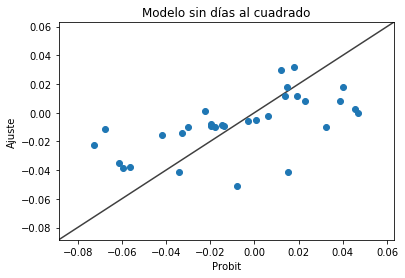

In [14]:
comparacion=pd.DataFrame(df2[['Estado','probit']])
comparacion['ajuste']=pred1

fig, ax = plt.subplots()
ax.scatter(comparacion['probit'],comparacion['ajuste'])

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
#ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.title('Modelo sin días al cuadrado')
plt.ylabel('Ajuste')
plt.xlabel('Probit')
plt.show()
